In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
file_uci_name = 'HospitalizadosUCIEtario_T.csv'
fold_uci_path = r'..\Datos-COVID19\output\producto9'
file_uci_path = os.path.join(fold_uci_path, file_uci_name)

file_dds_name = 'FallecidosEtario_T.csv'
fold_dds_path = r'..\Datos-COVID19\output\producto10'
file_dds_path = os.path.join(fold_dds_path, file_dds_name)

In [3]:
df_dds = pd.read_csv(file_dds_path)
df_uci = pd.read_csv(file_uci_path)
display(df_dds, df_uci)

,Grupo de edad,<=39,40-49,50-59,60-69,70-79,80-89,>=90
0,2020-04-09,2,1,1,9,21,19,4
1,2020-04-10,2,2,2,10,22,21,6
2,2020-04-11,3,2,2,12,24,24,6
3,2020-04-12,3,2,3,12,28,25,7
4,2020-04-13,3,2,3,12,29,26,7
5,2020-04-14,3,2,5,12,30,32,8
6,2020-04-15,3,2,5,12,31,33,8
7,2020-04-16,3,2,6,14,32,38,10
8,2020-04-17,4,2,8,16,36,40,10
9,2020-04-18,4,2,8,17,39,44,12


,Grupo de edad,<=39,40-49,50-59,60-69,>=70
0,2020-04-01,23,23,53,39,35
1,2020-04-02,23,27,67,46,37
2,2020-04-03,26,34,74,56,47
3,2020-04-04,40,36,84,68,52
4,2020-04-05,40,40,89,75,63
5,2020-04-06,38,40,95,78,76
6,2020-04-07,39,38,101,82,77
7,2020-04-08,42,39,109,93,79
8,2020-04-09,46,48,102,89,75
9,2020-04-10,45,48,111,99,80


In [4]:
38+40+96+111+88

373

In [5]:
lst_dds_70 = []
for ind in df_dds.index:
    lst_dds_70.append(df_dds.iloc[ind,5:].sum(axis=0))
df_dds['>=70']  = lst_dds_70
df_dds.drop(['70-79'], axis=1, inplace=True)
df_dds.drop(['80-89'], axis=1, inplace=True)
df_dds.drop(['>=90'] , axis=1, inplace=True)
ts_dds = pd.DataFrame([['2020-04-08',0,0,0,0,0]], columns=['Grupo de edad','<=39','40-49','50-59','60-69','>=70'])
df_dds = pd.concat([ts_dds, df_dds])
df_dds = df_dds.reset_index(drop=True)
df_dds

,Grupo de edad,<=39,40-49,50-59,60-69,>=70
0,2020-04-08,0,0,0,0,0
1,2020-04-09,2,1,1,9,44
2,2020-04-10,2,2,2,10,49
3,2020-04-11,3,2,2,12,54
4,2020-04-12,3,2,3,12,60
5,2020-04-13,3,2,3,12,62
6,2020-04-14,3,2,5,12,70
7,2020-04-15,3,2,5,12,72
8,2020-04-16,3,2,6,14,80
9,2020-04-17,4,2,8,16,86


In [6]:
df_dds['nd, <=39']  = df_dds['<=39'].diff(periods=1)
df_dds['nd, 40-49'] = df_dds['40-49'].diff(periods=1)
df_dds['nd, 50-59'] = df_dds['50-59'].diff(periods=1)
df_dds['nd, 60-69'] = df_dds['60-69'].diff(periods=1)
df_dds['nd, >=70']  = df_dds['>=70'].diff(periods=1)
df_dds = df_dds.reset_index(drop=True)
df_dds

,Grupo de edad,<=39,40-49,50-59,60-69,>=70,"nd, <=39","nd, 40-49","nd, 50-59","nd, 60-69","nd, >=70"
0,2020-04-08,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN
1,2020-04-09,2,1,1,9,44,2.0,1.0,1.0,9.0,44.0
2,2020-04-10,2,2,2,10,49,0.0,1.0,1.0,1.0,5.0
3,2020-04-11,3,2,2,12,54,1.0,0.0,0.0,2.0,5.0
4,2020-04-12,3,2,3,12,60,0.0,0.0,1.0,0.0,6.0
5,2020-04-13,3,2,3,12,62,0.0,0.0,0.0,0.0,2.0
6,2020-04-14,3,2,5,12,70,0.0,0.0,2.0,0.0,8.0
7,2020-04-15,3,2,5,12,72,0.0,0.0,0.0,0.0,2.0
8,2020-04-16,3,2,6,14,80,0.0,0.0,1.0,2.0,8.0
9,2020-04-17,4,2,8,16,86,1.0,0.0,2.0,2.0,6.0


In [7]:
lst_dds_39 = [] ; lst_dds_49 = [] 
lst_dds_59 = [] ; lst_dds_69 = []
lst_dds_70 = [] 
for ind in df_dds.index:
    date = df_dds['Grupo de edad'][ind]
    uci = df_uci[df_uci['Grupo de edad']==date]['<=39'].values
    dds = df_dds['nd, <=39'][ind]
    lst_dds_39.append(round(float(dds/uci),3))
    uci = df_uci[df_uci['Grupo de edad']==date]['40-49'].values
    dds = df_dds['nd, 40-49'][ind]
    lst_dds_49.append(round(float(dds/uci),3))
    uci = df_uci[df_uci['Grupo de edad']==date]['50-59'].values
    dds = df_dds['nd, 50-59'][ind]
    lst_dds_59.append(round(float(dds/uci),3))
    uci = df_uci[df_uci['Grupo de edad']==date]['60-69'].values
    dds = df_dds['nd, 60-69'][ind]
    lst_dds_69.append(round(float(dds/uci),3))
    uci = df_uci[df_uci['Grupo de edad']==date]['>=70'].values
    dds = df_dds['nd, >=70'][ind]
    lst_dds_70.append(round(float(dds/uci),3))
df_dds['%, <=39']  = lst_dds_39
df_dds['%, 40-49'] = lst_dds_49
df_dds['%, 50-59'] = lst_dds_59
df_dds['%, 60-69'] = lst_dds_69
df_dds['%, >=70']  = lst_dds_70
df_dds

,Grupo de edad,<=39,40-49,50-59,60-69,>=70,"nd, <=39","nd, 40-49","nd, 50-59","nd, 60-69","nd, >=70","%, <=39","%, 40-49","%, 50-59","%, 60-69","%, >=70"
0,2020-04-08,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-04-09,2,1,1,9,44,2.0,1.0,1.0,9.0,44.0,0.043,0.021,0.010,0.101,0.587
2,2020-04-10,2,2,2,10,49,0.0,1.0,1.0,1.0,5.0,0.000,0.021,0.009,0.010,0.062
3,2020-04-11,3,2,2,12,54,1.0,0.0,0.0,2.0,5.0,0.023,0.000,0.000,0.020,0.063
4,2020-04-12,3,2,3,12,60,0.0,0.0,1.0,0.0,6.0,0.000,0.000,0.009,0.000,0.073
5,2020-04-13,3,2,3,12,62,0.0,0.0,0.0,0.0,2.0,0.000,0.000,0.000,0.000,0.024
6,2020-04-14,3,2,5,12,70,0.0,0.0,2.0,0.0,8.0,0.000,0.000,0.019,0.000,0.095
7,2020-04-15,3,2,5,12,72,0.0,0.0,0.0,0.0,2.0,0.000,0.000,0.000,0.000,0.024
8,2020-04-16,3,2,6,14,80,0.0,0.0,1.0,2.0,8.0,0.000,0.000,0.010,0.018,0.093
9,2020-04-17,4,2,8,16,86,1.0,0.0,2.0,2.0,6.0,0.026,0.000,0.018,0.019,0.069


In [8]:
x_tim = df_dds['Grupo de edad'].values[2:]

y_39 = df_dds['nd, <=39'].values[2:]
y_49 = df_dds['nd, 40-49'].values[2:]
y_59 = df_dds['nd, 50-59'].values[2:]
y_69 = df_dds['nd, 60-69'].values[2:]
y_70 = df_dds['nd, >=70'].values[2:]

yp_39 = df_dds['%, <=39'].values[2:]
yp_49 = df_dds['%, 40-49'].values[2:]
yp_59 = df_dds['%, 50-59'].values[2:]
yp_69 = df_dds['%, 60-69'].values[2:]
yp_70 = df_dds['%, >=70'].values[2:]

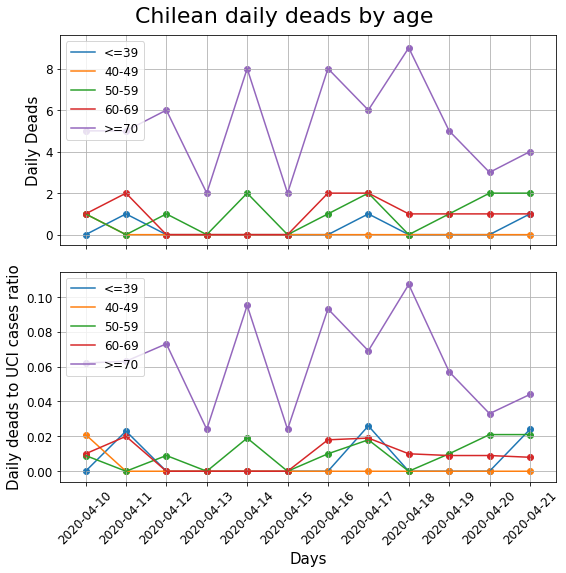

In [9]:
fig, axs = plt.subplots(2, sharex=True, figsize=(8,8))
fig.suptitle('Chilean daily deads by age',  y=0.99, fontsize = 22)

axs[0].plot(x_tim, y_39, label='<=39')
axs[0].scatter(x_tim, y_39)
axs[0].plot(x_tim, y_49, label='40-49')
axs[0].scatter(x_tim, y_49)
axs[0].plot(x_tim, y_59, label='50-59')
axs[0].scatter(x_tim, y_59)
axs[0].plot(x_tim, y_69, label='60-69')
axs[0].scatter(x_tim, y_69)
axs[0].plot(x_tim, y_70, label='>=70')
axs[0].scatter(x_tim, y_70)
axs[0].set_ylabel('Daily Deads', fontsize = 15)
axs[0].legend(loc='upper left', fontsize = 12)
axs[0].tick_params('y', labelsize=12)
axs[0].grid()

axs[1].plot(x_tim, yp_39, label='<=39')
axs[1].scatter(x_tim, yp_39)
axs[1].plot(x_tim, yp_49, label='40-49')
axs[1].scatter(x_tim, yp_49)
axs[1].plot(x_tim, yp_59, label='50-59')
axs[1].scatter(x_tim, yp_59)
axs[1].plot(x_tim, yp_69, label='60-69')
axs[1].scatter(x_tim, yp_69)
axs[1].plot(x_tim, yp_70, label='>=70')
axs[1].scatter(x_tim, yp_70)
axs[1].set_ylabel('Daily deads to UCI cases ratio', fontsize = 15)
axs[1].set_xlabel('Days', fontsize = 15)
axs[1].legend(loc='upper left', fontsize = 12)
axs[1].grid()
axs[1].tick_params('x', labelrotation=45, labelsize=12)
axs[1].tick_params('y', labelsize=12)

fig.tight_layout()
plt.subplots_adjust(top=0.94)

image_name = 'Covid19ChileUCIDeadsDayRatio.jpg'
folder_path = r'C:\Users\HN566KT\Downloads'
image_path = os.path.join(folder_path, image_name)
plt.savefig(image_path)

In [10]:
ts_uci = pd.DataFrame([['2020-03-31',0,0,0,0,0]], columns=['Grupo de edad','<=39','40-49','50-59','60-69','>=70'])
df_uci = pd.concat([ts_uci, df_uci])
df_uci = df_uci.reset_index(drop=True)
df_uci

,Grupo de edad,<=39,40-49,50-59,60-69,>=70
0,2020-03-31,0,0,0,0,0
1,2020-04-01,23,23,53,39,35
2,2020-04-02,23,27,67,46,37
3,2020-04-03,26,34,74,56,47
4,2020-04-04,40,36,84,68,52
5,2020-04-05,40,40,89,75,63
6,2020-04-06,38,40,95,78,76
7,2020-04-07,39,38,101,82,77
8,2020-04-08,42,39,109,93,79
9,2020-04-09,46,48,102,89,75


In [11]:
df_uci['nu, <=39']  = df_uci['<=39'].diff(periods=1)
df_uci['nu, 40-49'] = df_uci['40-49'].diff(periods=1)
df_uci['nu, 50-59'] = df_uci['50-59'].diff(periods=1)
df_uci['nu, 60-69'] = df_uci['60-69'].diff(periods=1)
df_uci['nu, >=70']  = df_uci['>=70'].diff(periods=1)
df_uci = df_uci.reset_index(drop=True)
df_uci.drop([0] , axis=0, inplace=True)
df_uci

,Grupo de edad,<=39,40-49,50-59,60-69,>=70,"nu, <=39","nu, 40-49","nu, 50-59","nu, 60-69","nu, >=70"
1,2020-04-01,23,23,53,39,35,23.0,23.0,53.0,39.0,35.0
2,2020-04-02,23,27,67,46,37,0.0,4.0,14.0,7.0,2.0
3,2020-04-03,26,34,74,56,47,3.0,7.0,7.0,10.0,10.0
4,2020-04-04,40,36,84,68,52,14.0,2.0,10.0,12.0,5.0
5,2020-04-05,40,40,89,75,63,0.0,4.0,5.0,7.0,11.0
6,2020-04-06,38,40,95,78,76,-2.0,0.0,6.0,3.0,13.0
7,2020-04-07,39,38,101,82,77,1.0,-2.0,6.0,4.0,1.0
8,2020-04-08,42,39,109,93,79,3.0,1.0,8.0,11.0,2.0
9,2020-04-09,46,48,102,89,75,4.0,9.0,-7.0,-4.0,-4.0
10,2020-04-10,45,48,111,99,80,-1.0,0.0,9.0,10.0,5.0


In [12]:
for ind in df_uci.index:
    if df_uci['nu, <=39'][ind] < 0:
        df_uci['nu, <=39'][ind] = 0
    if df_uci['nu, 40-49'][ind] < 0:
        df_uci['nu, 40-49'][ind] = 0
    if df_uci['nu, 50-59'][ind] < 0:
        df_uci['nu, 50-59'][ind] = 0
    if df_uci['nu, 60-69'][ind] < 0:
        df_uci['nu, 60-69'][ind] = 0
    if df_uci['nu, >=70'][ind] < 0:
        df_uci['nu, >=70'][ind] = 0

df_uci

C:\Users\HN566KT\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\HN566KT\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\HN566KT\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/sta

,Grupo de edad,<=39,40-49,50-59,60-69,>=70,"nu, <=39","nu, 40-49","nu, 50-59","nu, 60-69","nu, >=70"
1,2020-04-01,23,23,53,39,35,23.0,23.0,53.0,39.0,35.0
2,2020-04-02,23,27,67,46,37,0.0,4.0,14.0,7.0,2.0
3,2020-04-03,26,34,74,56,47,3.0,7.0,7.0,10.0,10.0
4,2020-04-04,40,36,84,68,52,14.0,2.0,10.0,12.0,5.0
5,2020-04-05,40,40,89,75,63,0.0,4.0,5.0,7.0,11.0
6,2020-04-06,38,40,95,78,76,0.0,0.0,6.0,3.0,13.0
7,2020-04-07,39,38,101,82,77,1.0,0.0,6.0,4.0,1.0
8,2020-04-08,42,39,109,93,79,3.0,1.0,8.0,11.0,2.0
9,2020-04-09,46,48,102,89,75,4.0,9.0,0.0,0.0,0.0
10,2020-04-10,45,48,111,99,80,0.0,0.0,9.0,10.0,5.0


In [13]:
df_uci['cum, <=39']  = df_uci['nu, <=39'].cumsum()
df_uci['cum, 40-49'] = df_uci['nu, 40-49'].cumsum()
df_uci['cum, 50-59'] = df_uci['nu, 50-59'].cumsum()
df_uci['cum, 60-69'] = df_uci['nu, 60-69'].cumsum()
df_uci['cum, >=70']  = df_uci['nu, >=70'].cumsum()
df_uci

,Grupo de edad,<=39,40-49,50-59,60-69,>=70,"nu, <=39","nu, 40-49","nu, 50-59","nu, 60-69","nu, >=70","cum, <=39","cum, 40-49","cum, 50-59","cum, 60-69","cum, >=70"
1,2020-04-01,23,23,53,39,35,23.0,23.0,53.0,39.0,35.0,23.0,23.0,53.0,39.0,35.0
2,2020-04-02,23,27,67,46,37,0.0,4.0,14.0,7.0,2.0,23.0,27.0,67.0,46.0,37.0
3,2020-04-03,26,34,74,56,47,3.0,7.0,7.0,10.0,10.0,26.0,34.0,74.0,56.0,47.0
4,2020-04-04,40,36,84,68,52,14.0,2.0,10.0,12.0,5.0,40.0,36.0,84.0,68.0,52.0
5,2020-04-05,40,40,89,75,63,0.0,4.0,5.0,7.0,11.0,40.0,40.0,89.0,75.0,63.0
6,2020-04-06,38,40,95,78,76,0.0,0.0,6.0,3.0,13.0,40.0,40.0,95.0,78.0,76.0
7,2020-04-07,39,38,101,82,77,1.0,0.0,6.0,4.0,1.0,41.0,40.0,101.0,82.0,77.0
8,2020-04-08,42,39,109,93,79,3.0,1.0,8.0,11.0,2.0,44.0,41.0,109.0,93.0,79.0
9,2020-04-09,46,48,102,89,75,4.0,9.0,0.0,0.0,0.0,48.0,50.0,109.0,93.0,79.0
10,2020-04-10,45,48,111,99,80,0.0,0.0,9.0,10.0,5.0,48.0,50.0,118.0,103.0,84.0


In [14]:
lst_dds_39 = [] ; lst_dds_49 = [] 
lst_dds_59 = [] ; lst_dds_69 = []
lst_dds_70 = [] 
for ind in df_dds.index:
    date = df_dds['Grupo de edad'][ind]
    uci = df_uci[df_uci['Grupo de edad']==date]['cum, <=39'].values
    dds = df_dds['<=39'][ind]
    lst_dds_39.append(round(float(dds/uci),3))
    uci = df_uci[df_uci['Grupo de edad']==date]['cum, 40-49'].values
    dds = df_dds['40-49'][ind]
    lst_dds_49.append(round(float(dds/uci),3))
    uci = df_uci[df_uci['Grupo de edad']==date]['cum, 50-59'].values
    dds = df_dds['50-59'][ind]
    lst_dds_59.append(round(float(dds/uci),3))
    uci = df_uci[df_uci['Grupo de edad']==date]['cum, 60-69'].values
    dds = df_dds['60-69'][ind]
    lst_dds_69.append(round(float(dds/uci),3))
    uci = df_uci[df_uci['Grupo de edad']==date]['cum, >=70'].values
    dds = df_dds['>=70'][ind]
    lst_dds_70.append(round(float(dds/uci),3))
df_dds['cum %, <=39']  = lst_dds_39
df_dds['cum %, 40-49'] = lst_dds_49
df_dds['cum %, 50-59'] = lst_dds_59
df_dds['cum %, 60-69'] = lst_dds_69
df_dds['cum %, >=70']  = lst_dds_70
df_dds.drop([0] , axis=0, inplace=True)
df_dds

,Grupo de edad,<=39,40-49,50-59,60-69,>=70,"nd, <=39","nd, 40-49","nd, 50-59","nd, 60-69",...,"%, <=39","%, 40-49","%, 50-59","%, 60-69","%, >=70","cum %, <=39","cum %, 40-49","cum %, 50-59","cum %, 60-69","cum %, >=70"
1,2020-04-09,2,1,1,9,44,2.0,1.0,1.0,9.0,...,0.043,0.021,0.010,0.101,0.587,0.042,0.020,0.009,0.097,0.557
2,2020-04-10,2,2,2,10,49,0.0,1.0,1.0,1.0,...,0.000,0.021,0.009,0.010,0.062,0.042,0.040,0.017,0.097,0.583
3,2020-04-11,3,2,2,12,54,1.0,0.0,0.0,2.0,...,0.023,0.000,0.000,0.020,0.063,0.062,0.038,0.017,0.115,0.643
4,2020-04-12,3,2,3,12,60,0.0,0.0,1.0,0.0,...,0.000,0.000,0.009,0.000,0.073,0.062,0.038,0.025,0.109,0.690
5,2020-04-13,3,2,3,12,62,0.0,0.0,0.0,0.0,...,0.000,0.000,0.000,0.000,0.024,0.062,0.038,0.025,0.109,0.697
6,2020-04-14,3,2,5,12,70,0.0,0.0,2.0,0.0,...,0.000,0.000,0.019,0.000,0.095,0.060,0.038,0.042,0.109,0.787
7,2020-04-15,3,2,5,12,72,0.0,0.0,0.0,0.0,...,0.000,0.000,0.000,0.000,0.024,0.060,0.037,0.041,0.104,0.800
8,2020-04-16,3,2,6,14,80,0.0,0.0,1.0,2.0,...,0.000,0.000,0.010,0.018,0.093,0.060,0.037,0.049,0.121,0.879
9,2020-04-17,4,2,8,16,86,1.0,0.0,2.0,2.0,...,0.026,0.000,0.018,0.019,0.069,0.080,0.036,0.062,0.138,0.935
10,2020-04-18,4,2,8,17,95,0.0,0.0,0.0,1.0,...,0.000,0.000,0.000,0.010,0.107,0.080,0.036,0.062,0.147,1.033


In [15]:
x_tim = df_dds['Grupo de edad'].values

y_39 = df_dds['<=39'].values
y_49 = df_dds['40-49'].values
y_59 = df_dds['50-59'].values
y_69 = df_dds['60-69'].values
y_70 = df_dds['>=70'].values

yp_39 = df_dds['cum %, <=39'].values
yp_49 = df_dds['cum %, 40-49'].values
yp_59 = df_dds['cum %, 50-59'].values
yp_69 = df_dds['cum %, 60-69'].values
yp_70 = df_dds['cum %, >=70'].values

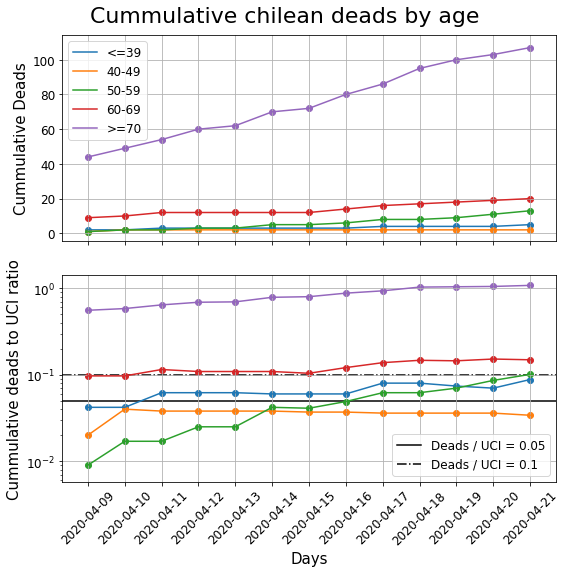

In [22]:
fig, axs = plt.subplots(2, sharex=True, figsize=(8,8))
fig.suptitle('Cummulative chilean deads by age',  y=0.99, fontsize = 22)

axs[0].plot(x_tim, y_39, label='<=39')
axs[0].scatter(x_tim, y_39)
axs[0].plot(x_tim, y_49, label='40-49')
axs[0].scatter(x_tim, y_49)
axs[0].plot(x_tim, y_59, label='50-59')
axs[0].scatter(x_tim, y_59)
axs[0].plot(x_tim, y_69, label='60-69')
axs[0].scatter(x_tim, y_69)
axs[0].plot(x_tim, y_70, label='>=70')
axs[0].scatter(x_tim, y_70)
axs[0].set_ylabel('Cummulative Deads', fontsize = 15)
axs[0].legend(loc='upper left', fontsize = 12)
axs[0].tick_params('y', labelsize=12)
axs[0].grid()

axs[1].plot(x_tim, yp_39)
axs[1].scatter(x_tim, yp_39)
axs[1].plot(x_tim, yp_49)
axs[1].scatter(x_tim, yp_49)
axs[1].plot(x_tim, yp_59)
axs[1].scatter(x_tim, yp_59)
axs[1].plot(x_tim, yp_69)
axs[1].scatter(x_tim, yp_69)
axs[1].plot(x_tim, yp_70)
axs[1].scatter(x_tim, yp_70)
axs[1].set_ylabel('Cummulative deads to UCI ratio', fontsize = 15)
axs[1].set_xlabel('Days', fontsize = 15)
axs[1].axhline(y=0.05, c="k", linestyle='-', zorder=0, label='Deads / UCI = 0.05')
axs[1].axhline(y=0.1, c="k", linestyle='-.', zorder=0, label='Deads / UCI = 0.1')
axs[1].legend(loc='lower right', fontsize = 12)
axs[1].set_yscale('log')
axs[1].grid()
axs[1].tick_params('x', labelrotation=45, labelsize=12)
axs[1].tick_params('y', labelsize=12)

fig.tight_layout()
plt.subplots_adjust(top=0.94)

image_name = 'Covid19ChileUCIDeadsCumRatio.jpg'
folder_path = r'C:\Users\HN566KT\Downloads'
image_path = os.path.join(folder_path, image_name)
plt.savefig(image_path)